In [1]:
import numpy as np


# Lab 5: Introduction to Matplotlib

Problem 1: 

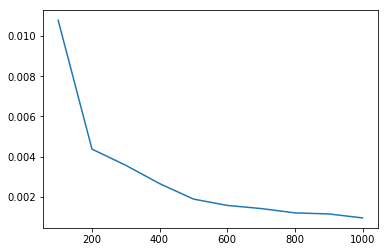

In [2]:
#.1 n x n array filled with samples of normal distribution

import numpy as np
from matplotlib import pyplot as plt

def randommatrixvar(n):
    rmtrx = np.random.randn(n, n)
    means = np.mean(rmtrx, axis = 1)
    var = np.var(means)
    return var

x = []
y = []
for i in range(10):
    n = (i + 1) * 100
    x.append(n)
    var_n = randommatrixvar(n)
    y.append(var_n)

plot = plt.plot(x,y)
plt.show()

#randommatrixvar(5)

Problem 2:

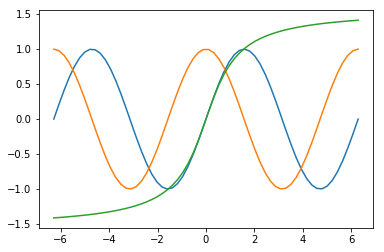

In [3]:
import math
import numpy as np

x = np.linspace(-2*np.pi, 2*np.pi, 60)
sinx = np.sin(x)
cosx = np.cos(x)
arctanx = np.arctan(x)
plt.plot(x, sinx)
plt.plot(x, cosx)
plt.plot(x, arctanx)
plt.show()

Problem 3:

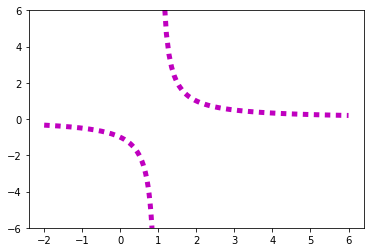

In [4]:
x1 = np.linspace(-2, 0.99, 500)
x2 = np.linspace(1.01, 6, 75)
y1 = 1/(x1-1)
y2 = 1/(x2-1)

plt.plot(x1, y1, 'm:', linewidth = 5)
plt.plot(x2, y2, 'm:', linewidth = 5)
plt.ylim(-6,6)
plt.show()


Problem 4: Write a function, such that given an array, it makes a copy and returns copy with all negative entries set to zero 

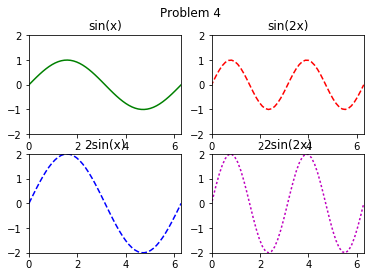

In [5]:

x = np.linspace(-2*np.pi, 2*np.pi, 100)
plt.suptitle("Problem 4")

plt.subplot(221)
plt.title("sin(x)")
plt.axis([0,2*np.pi,-2,2])
plt.plot(x, np.sin(x), 'g')

plt.subplot(222)
plt.title("sin(2x)")
plt.axis([0,2*np.pi,-2,2])
plt.plot(x, np.sin(2*x),'r--')

plt.subplot(223)
plt.title("2sin(x)")
plt.axis([0,2*np.pi,-2,2])
plt.plot(x, 2*np.sin(x),'b--')

plt.subplot(224)
plt.title("2sin(2x)")
plt.axis([0,2*np.pi,-2,2])
plt.plot(x, 2*np.sin(2*x),'m:')



plt.show()

Problem 5: 

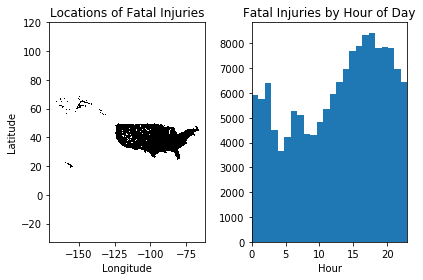

In [6]:
fars = np.load('FARS.npy')

plt.subplot(121)
plt.axis('equal')
plt.title("Locations of Fatal Injuries")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.plot(fars.T[1],fars.T[2],'k,')

plt.subplot(122)
plt.xlim(0,23)
plt.title("Fatal Injuries by Hour of Day")
plt.xlabel("Hour")
plt.hist(fars.T[0], bins=24)

plt.tight_layout()
plt.show()


Problem 6: 

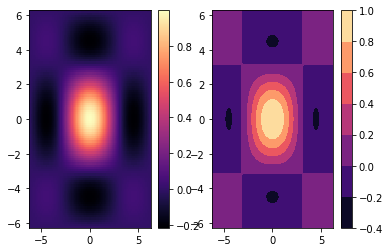

In [7]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = x.copy()
X, Y = np.meshgrid(x,y)
Z = (np.sin(X)*np.sin(Y))/(X*Y)

plt.subplot(121)
plt.pcolormesh(X, Y, Z, cmap = "magma")
plt.colorbar()
plt.xlim(-2*np.pi, 2*np.pi)
plt.ylim(-2*np.pi, 2*np.pi)

plt.subplot(122)
plt.contourf(X, Y, Z, cmap = "magma")
plt.colorbar()
plt.xlim(-2*np.pi, 2*np.pi)
plt.ylim(-2*np.pi, 2*np.pi)
plt.show()

# Lab 12: Data Visualization

Problem 1: 

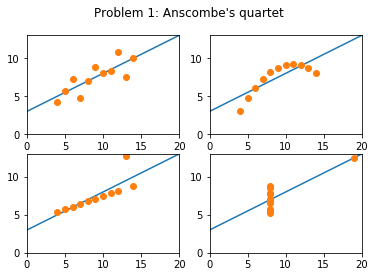

In [8]:
anscombe = np.load('anscombe.npy')
rows = np.transpose(anscombe)

x = np.linspace(0,20,10)
y = 0.5*x + 3

for i in range(4):
    num = 221 + i
    plt.subplot(num)
    plt.axis([0,20,0,13])
    plt.plot(x,y)
    plt.plot(rows[2*i], rows[2*i + 1], 'o')

plt.suptitle("Problem 1: Anscombe's quartet")
plt.show()

For the first plot looks like a good fit for somewhat scattered data.
For the second plot, it looks like the data would have a much better quadratic fit.
For the third plot, a line fit would be good, but there is single an outlier that biases the regression results.
For the fourth plot, all but one point have the x-value 8, which makes it look like this might be the only value x could take, and that the non-8 point might be an error.

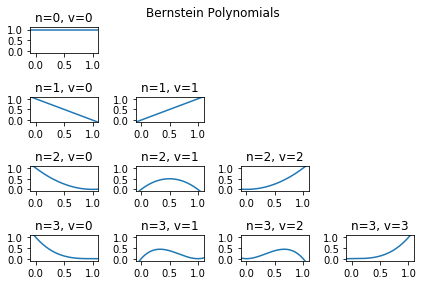

In [9]:
import scipy.misc




def Bernsteinpolys(m, xlo = 0, xhi = 1, ylo = 0, yhi = 1):
    x = np.linspace(xlo - 0.1, xhi + 0.1, int(200*(xhi-xlo)))
    n = 0
    while n <= m:
        v = 0
        while v <= n:
            plt.subplot(m+1, m+1, (m+1)*n+v+1)
            plt.plot(x, scipy.misc.comb(n, v)*(x**v)*(1 - x)**(n - v))
            plt.title("n=" + str(n) + ", v=" + str(v))
            plt.xticks(np.linspace(xlo, xhi, 3))
            plt.yticks(np.linspace(ylo, yhi, 3))
            plt.axis([xlo - 0.1, xhi + 0.1, ylo - 0.1, yhi + 0.1])
            v += 1
        n += 1
    plt.suptitle("Bernstein Polynomials")
    plt.tight_layout()
    plt.show()   

Bernsteinpolys(3)   



Problem 3: 

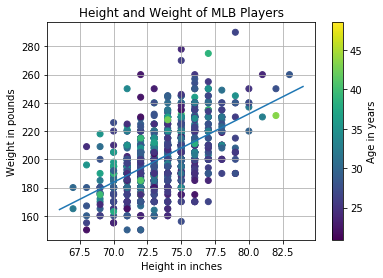

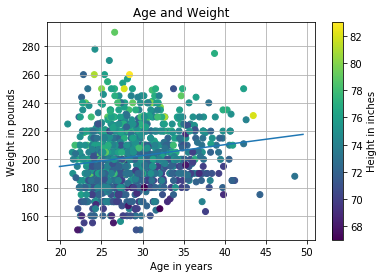

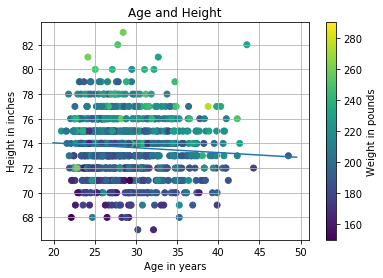

In [10]:
mlb = np.load('MLB.npy')
height = mlb.T[0]
weight = mlb.T[1]
age = mlb.T[2]


# Height and Weight
plt.scatter(height, weight, c=age)
cbar = plt.colorbar()
plt.xlabel("Height in inches")
plt.ylabel("Weight in pounds")
cbar.set_label("Age in years")
plt.grid()
plt.title("Height and Weight of MLB Players")

m, b = np.polyfit(height, weight, 1)
x = np.linspace(min(height)-1,max(height)+1,100)
y = m*x+b
plt.plot(x,y)

plt.show()

# Age and Weight
plt.scatter(age, weight, c=height)
cbar = plt.colorbar()
plt.xlabel("Age in years")
plt.ylabel("Weight in pounds")
cbar.set_label("Height in inches")
plt.grid()
plt.title("Age and Weight")

m, b = np.polyfit(age, weight, 1)
x = np.linspace(min(age)-1,max(age)+1,100)
y = m*x+b
plt.plot(x,y)

plt.show()

# Age and Height
plt.scatter(age, height, c=weight)
cbar = plt.colorbar()
plt.xlabel("Age in years")
plt.ylabel("Height in inches")
cbar.set_label("Weight in pounds")
plt.grid()
plt.title("Age and Height")

m, b = np.polyfit(age, height, 1)
x = np.linspace(min(age)-1,max(age)+1,100)
y = m*x+b
plt.plot(x,y)

plt.show()

Problem 4: 

In [11]:
np.linspace(2000, 2010, 11)

array([ 2000.,  2001.,  2002.,  2003.,  2004.,  2005.,  2006.,  2007.,
        2008.,  2009.,  2010.])

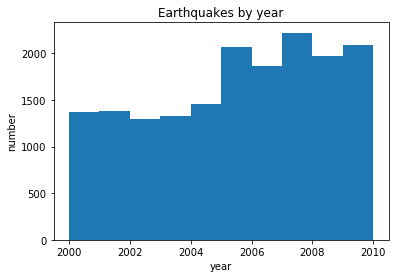

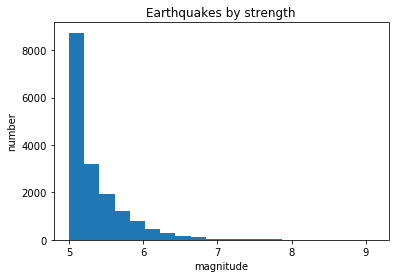

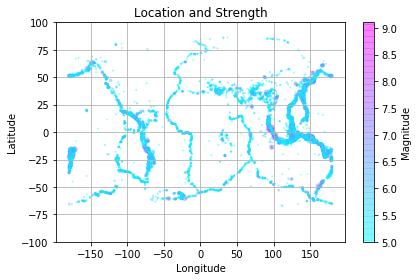

In [12]:
earthquakes = np.load('earthquakes.npy')
rows = np.transpose(earthquakes)
year = rows[0]
magnitude = rows[1]
longitude = rows[2]
latitude = rows[3]

plt.hist(year, bins=np.linspace(2000, 2010, 11))
plt.xlabel("year")
plt.ylabel("number")
plt.title("Earthquakes by year")

plt.show()


plt.hist(magnitude, bins=20)
plt.xticks(np.linspace(5,9,5))
plt.xlabel("magnitude")
plt.ylabel("number")
plt.title("Earthquakes by strength")

plt.show()


plt.scatter(longitude, latitude, cmap = "cool", c = magnitude, s=np.exp(magnitude-min(magnitude)), alpha=.3)
cbar = plt.colorbar()
plt.xticks(np.linspace(-150, 150, 7))
plt.xlabel("Longitude")
plt.yticks(np.linspace(-100, 100, 9))
plt.ylabel("Latitude")
cbar.set_label("Magnitude")
plt.grid()
plt.title("Location and Strength")



plt.tight_layout()
plt.show()


Problem 5:

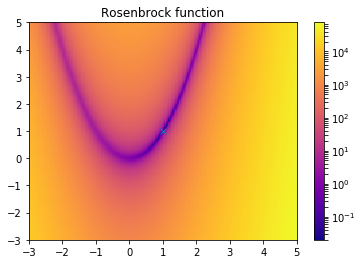

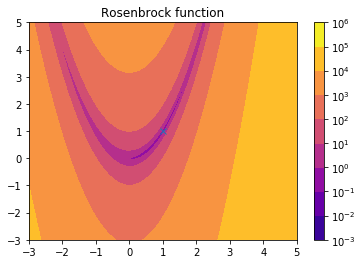

In [13]:
from matplotlib.colors import LogNorm

x = np.linspace(-3, 5, 200)
y = np.linspace(-3, 5, 200)
X, Y = np.meshgrid(x, y)
Z = (1-X)**2 + 100*(Y-X**2)**2

plt.pcolormesh(X, Y, Z, cmap="plasma", norm = LogNorm())
plt.colorbar()
plt.plot([1],[1],"x")

plt.title("Rosenbrock function")

plt.show()

x = np.linspace(-3, 5, 200)
y = np.linspace(-3, 5, 200)
X, Y = np.meshgrid(x, y)
Z = (1-X)**2 + 100*(Y-X**2)**2

plt.contourf(X, Y, Z, 6, cmap="plasma", norm = LogNorm())
plt.colorbar()
plt.plot([1],[1],"x")

plt.title("Rosenbrock function")

plt.show()

Problem 6:

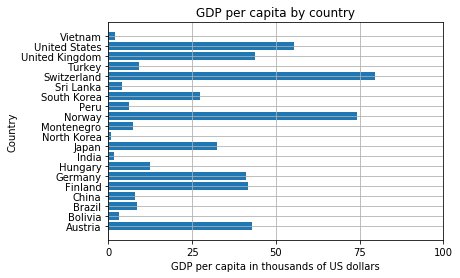

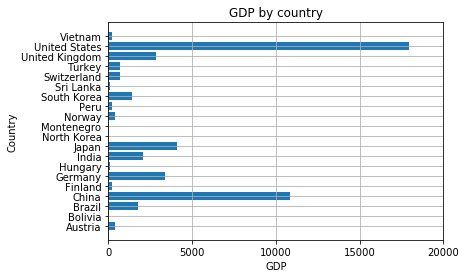

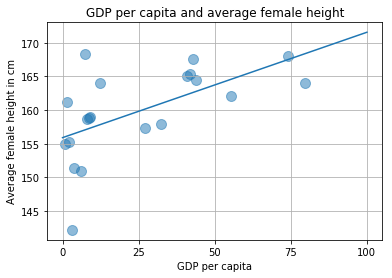

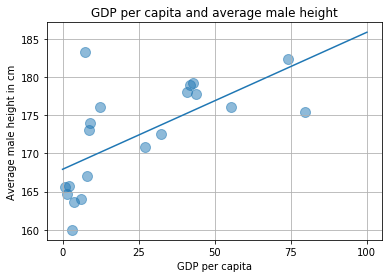

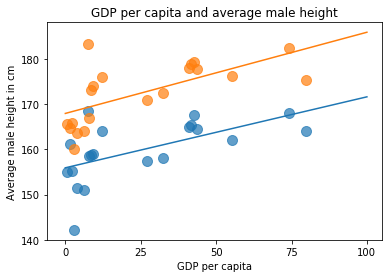

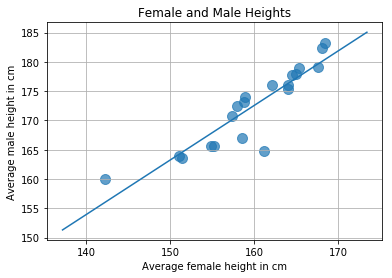

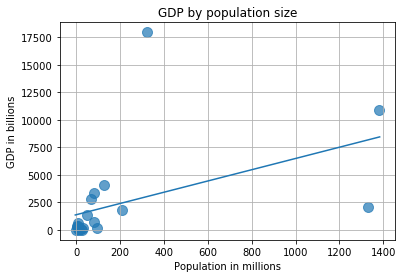

In [14]:
countries = np.load('countries.npy')
popsize = countries.T[0]
gdp = countries.T[1]
mheight = countries.T[2]
fheight = countries.T[3]
gdppc = gdp/popsize


countries = ["Austria", "Bolivia", "Brazil", "China",
"Finland", "Germany", "Hungary", "India",
"Japan", "North Korea", "Montenegro", "Norway",
"Peru", "South Korea", "Sri Lanka", "Switzerland",
"Turkey", "United Kingdom", "United States", "Vietnam"]
index = np.arange(len(countries))

# GDP per capita by country
plt.barh(index, gdppc)
plt.yticks(index, countries)
plt.xticks(np.linspace(0, 100, 5))
plt.grid()
plt.title("GDP per capita by country")
plt.ylabel("Country")
plt.xlabel("GDP per capita in thousands of US dollars")
plt.show()

# GDP by country
plt.barh(index, gdp, align="center")
plt.yticks(index, countries)
plt.xticks(np.linspace(0, 20000, 5))
plt.grid()
plt.title("GDP by country")
plt.ylabel("Country")
plt.xlabel("GDP")
plt.show()

# GDP per capita and average female height
plt.scatter(gdppc, fheight, s=100, alpha=0.5)
plt.xlabel("GDP per capita")
plt.xticks(np.linspace(0, 100, 5))
plt.ylabel("Average female height in cm")
plt.grid()
plt.title("GDP per capita and average female height")

m, b = np.polyfit(gdppc, fheight, 1)
x = np.linspace(0 ,100, 100)
y = m*x+b
plt.plot(x,y)

plt.show()

# GDP per capita and average male height
plt.scatter(gdppc, mheight, s=100, alpha=0.5)
plt.xlabel("GDP per capita")
plt.xticks(np.linspace(0, 100, 5))
plt.ylabel("Average male height in cm")
plt.grid()
plt.title("GDP per capita and average male height")

m, b = np.polyfit(gdppc, mheight, 1)
x = np.linspace(0 ,100, 100)
y = m*x+b
plt.plot(x,y)

plt.show()

# GDP per capita and average female and male height
plt.scatter(gdppc, fheight, s=100, alpha=0.7)
plt.xlabel("GDP per capita")
plt.xticks(np.linspace(0, 100, 5))
plt.ylabel("Average female height in cm")
plt.grid()
plt.title("GDP per capita and average female height")

m, b = np.polyfit(gdppc, fheight, 1)
x = np.linspace(0 ,100, 100)
y = m*x+b
plt.plot(x,y)

plt.scatter(gdppc, mheight, s=100, alpha=0.7)
plt.xlabel("GDP per capita")
plt.xticks(np.linspace(0, 100, 5))
plt.ylabel("Average male height in cm")
plt.grid()
plt.title("GDP per capita and average male height")

m, b = np.polyfit(gdppc, mheight, 1)
x = np.linspace(0 ,100, 100)
y = m*x+b
plt.plot(x,y)

plt.show()

# Average female and male heights
plt.scatter(fheight, mheight, s = 100, alpha = 0.7)
plt.xlabel("Average female height in cm")

plt.xticks(np.linspace(140, 180, 5))
plt.ylabel("Average male height in cm")
plt.grid()
plt.title("Female and Male Heights")

m, b = np.polyfit(fheight, mheight, 1)
x = np.linspace(min(fheight) - 5 ,max(fheight) + 5, 100)
y = m*x+b
plt.plot(x,y)


plt.show()



# GDP by population
plt.scatter(popsize, gdp, s = 100, alpha = 0.7)
plt.xlabel("Population in millions")
plt.ylabel("GDP in billions")
plt.grid()
plt.title("GDP by population size")

m, b = np.polyfit(popsize, gdp, 1)
x = np.linspace(min(popsize) - 5 ,max(popsize) + 5, 100)
y = m*x+b
plt.plot(x,y)

plt.show()




From the first plot, we can detect the richest and poorest countries in terms of GDP per capita. 
The second plot allows us to gage the significance of the individual countries in the total world economy.
The next three plots show the correlation between GDP per capita and heights for both male and female heights.
The next plot shows us the correlation in average male and female heights.
The final plot scatterplots GDP by population.


# Lab 6: Pandas I: Introduction to Pandas

Problem 1:

In [15]:
import pandas as pd
print(np.arange(2, 12, 2))

pds1 = pd.Series(-3,  index=np.arange(2, 12, 2))
print(pds1)


dic = {'Bill': 31, 'Sarah': 28, 'Jane': 34, 'Joe': 26}
pds2 = pd.Series(dic)

print(pds2)

for i in range(2,5):
    print(i)

[ 2  4  6  8 10]
2    -3
4    -3
6    -3
8    -3
10   -3
dtype: int64
Bill     31
Jane     34
Joe      26
Sarah    28
dtype: int64
2
3
4


Problem 2:

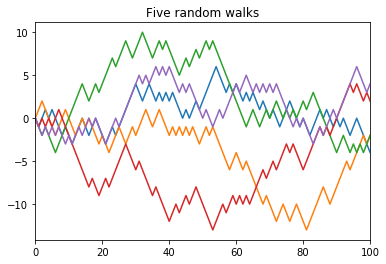

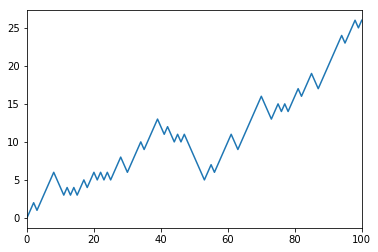

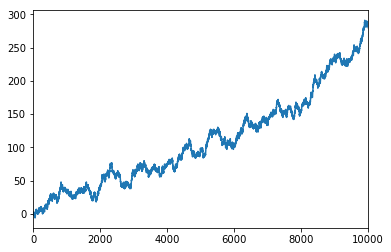

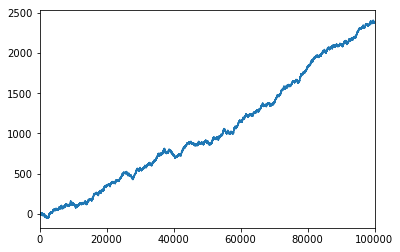

In [16]:
from matplotlib import pyplot as plt


def randomwalk(length, prob = 0.5):
    walk = np.zeros((length + 1))
    direction = [1, -1]
    for i in range(1, length + 1):
        walk[i] = walk[i-1] + np.random.choice(direction, p = np.array([prob, 1- prob]))
    series = pd.Series(walk)
    return series

plt.title("Five random walks")
for i in range(0,5):
    randomwalk(100).plot()
plt.show()


s100 = randomwalk(100, 0.51)
s100.plot()
plt.show()  

randomwalk(10000, prob = 0.51).plot()
plt.show()  

randomwalk(100000,0.51).plot()
plt.show()


Problem 3:

In [17]:
                                                                                                                                                          

name = ['Mylan', 'Regan', 'Justin','Jess', 'Jason','Remi', 'Matt','Alexander', 'JeanMarie']
sex = ['M','F','M','F','M','F','M','M','F']
age = [20,21,18,22,19,20,20,19,20]
rank = ['Sp','Se','Fr','Se','Sp','J','J','J','Se']
ID = range(9)
aid = ['y','n','n','y','n','n','n','y','n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y','n','y','n','n']

studentInfo = pd.DataFrame({'ID':ID,'Name':name,'Sex':sex,'Age':age,'Class':rank})
otherInfo = pd.DataFrame({'ID':ID,'GPA':GPA,'Financial_Aid':aid})
mathInfo = pd.DataFrame({'ID':mathID,'Grade':mathGd,'Math_Major':major})

studentInfo[(studentInfo['Age'] >19) & (studentInfo['Sex'] == 'M')][['ID','Name']]

,ID,Name
0,0,Mylan
6,6,Matt


Problem 4:

In [18]:
pd.merge(studentInfo[studentInfo['Sex']=='M'] ,otherInfo,on='ID')[['ID','Age','GPA']]


,ID,Age,GPA
0,0,20,3.8
1,2,18,3.0
2,4,19,2.8
3,6,20,3.8
4,7,19,3.4


Problem 5:

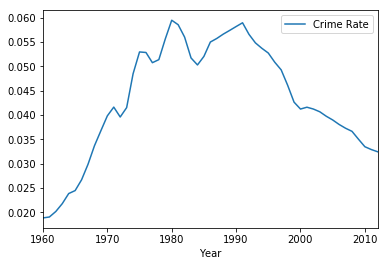

The five years with highest crime rate
    Year  Crime Rate
20  1980    0.059500
31  1991    0.058978
21  1981    0.058582
30  1990    0.058203
29  1989    0.057410
Years with below average number of crimes but higher than average number of burglaries:
    Year     Total  Burglary
13  1973   8718100   2565500
14  1974  10253400   3039200


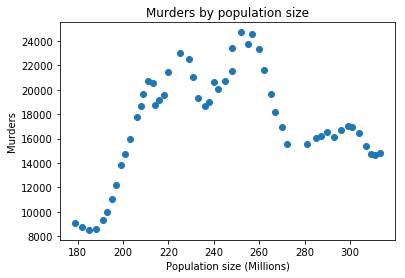

In [19]:

df = pd.read_csv('crime_data.txt', skiprows=1, header= 0)


df['Crime Rate'] = df['Total']/df['Population']


df.plot(x='Year', y='Crime Rate', )
plt.show()


print("The five years with highest crime rate")
print(df.nlargest(5,'Crime Rate')[['Year','Crime Rate']])



mean_burg = df["Burglary"].mean()
mean_tot = df["Total"].mean()


print("Years with below average number of crimes but higher than average number of burglaries:")
print(df[(df['Burglary'] > mean_burg) & (df['Total'] < mean_tot)][['Year','Total','Burglary']])

# Murders by population
plt.scatter(df['Population']//1000000,df['Murder'])
plt.title("Murders by population size")
plt.xlabel("Population size (Millions)")
plt.ylabel("Murders")
plt.show()


# Lab 8: Pandas III

Problem 1:

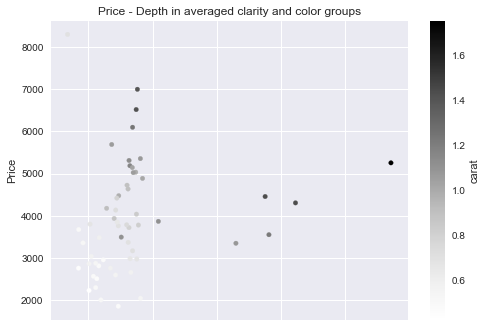

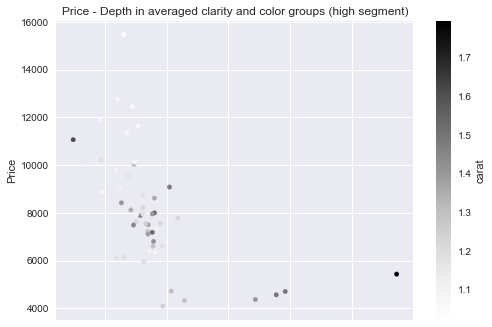

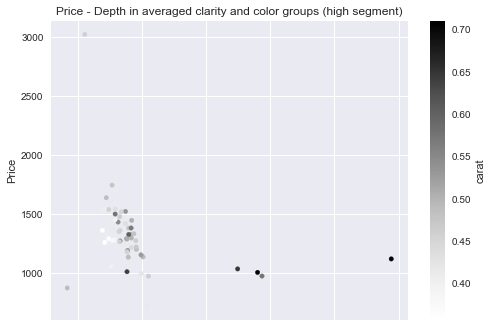

In [20]:
import pandas as pd
from pydataset import data
import seaborn as sns

#import pydataset as data
diamonds = data('diamonds')

diamondsall = diamonds.groupby(['clarity','color'])
averageccc = diamondsall.mean()
averageccc.plot.scatter(x='depth', y='price', c='carat')

plt.title("Price - Depth in averaged clarity and color groups")
plt.xlabel("Depth")
plt.ylabel("Price")
plt.show()


# We look at the high carat segment
diamondshigh = diamonds[(diamonds['carat']> diamonds['carat'].mean())]


cccdiamonds = diamondshigh.groupby(['clarity','color'])
averageccc = cccdiamonds.mean()
averageccc.plot.scatter(x='depth', y='price', c='carat')

plt.title("Price - Depth in averaged clarity and color groups (high segment)")
plt.xlabel("Depth")
plt.ylabel("Price")
plt.show()



diamondslow = diamonds[(diamonds['carat'] < diamonds['carat'].mean())]

cccdiamonds = diamondslow.groupby(['clarity','color'])
averageccc = cccdiamonds.mean()
averageccc.plot.scatter(x='depth', y='price', c='carat')

plt.title("Price - Depth in averaged clarity and color groups (high segment)")
plt.xlabel("Depth")
plt.ylabel("Price")
plt.show()



In the above plots, I investigated the role of depth on price. In the first plot, I plot depth against price, where each point represents a color and clarity combination, and the color of the point shows the carat value with a colorbar. I observe that it is hard to distinguish a trend, at least partially because carats heavily influence the price and I average across a great magnitude of sample points.
The strategy for the next two plots is thus to segment the sample into high and low carat, and the plots for the two segments show a slightly negative trend. 
Obviously, we cannot say anything for certain from these plots, and a numerical regression analysis would be much more fruitful.

Problem 2:

In [34]:

titanic = pd.read_csv('titanic.csv', header=0)

# Survival percentage by location embarked
print(titanic.groupby('Embarked').mean()['Survived'])
print('')


# Survival percentage by location embarked and sex
print(titanic.pivot_table('Survived', index=['Sex'], columns=['Embarked']))
print('')

# Survival percentage by location embarked and class
print(titanic.pivot_table('Survived', index=['Pclass'], columns = ['Embarked']))
print('')

# Survival percentage by location embarked and age
agegroups = pd.cut(titanic['Age'],[0, 16, 35, 55, 80])
print(titanic.pivot_table('Survived', index=[agegroups], columns = ['Embarked']))




Embarked
C    0.555556
Q    0.357724
S    0.332604
Name: Survived, dtype: float64

Embarked         C         Q         S
Sex                                   
female    0.902655  0.616667  0.680412
male      0.305732  0.111111  0.170144

Embarked         C         Q         S
Pclass                                
1.0       0.687943  0.666667  0.559322
2.0       0.571429  0.285714  0.417355
3.0       0.366337  0.353982  0.210101

Embarked         C         Q         S
Age                                   
(0, 16]   0.807692  0.375000  0.500000
(16, 35]  0.598039  0.290323  0.341357
(35, 55]  0.626866  0.166667  0.338624
(55, 80]  0.470588  0.000000  0.277778


The analysis above suggests that passengers that embarked at 'C' were at an advantage for survival to their peers from other locations, peers being defined as same age, sex, or class.



Problem 3:

I made some extra tables and plots for Visualization, Problem 6 above.

# Lab 1: Pandas IV: Time Series

Problem 1:

In [39]:
DJIA = pd.read_csv('DJIA.csv')
DJIA.index = pd.to_datetime(DJIA['DATE'])
DJIA = DJIA.replace(".",np.nan)
del DJIA['DATE']
print(DJIA.head())

               VALUE
DATE                
2006-09-27  11689.24
2006-09-28  11718.45
2006-09-29  11679.07
2006-10-02  11670.35
2006-10-03  11727.34


Problem 2:

In [40]:
paychecks = pd.read_csv("paychecks.csv",index_col=False,header=None, squeeze=True)

fri1 = pd.date_range(start = '3/13/2008', periods=47, freq="WOM-1FRI")
fri3 = pd.date_range(start ='3/13/2008', periods=46, freq="WOM-3FRI")
dates = fri1.union(fri3)

paychecks.index = pd.to_datetime(dates)
print(paychecks.head())

2008-03-21    1122.26
2008-04-04     921.03
2008-04-18     962.46
2008-05-02    1035.97
2008-05-16    1078.59
Name: 0, dtype: float64


Problem 3:

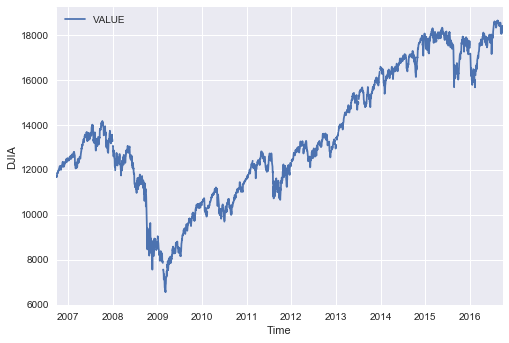

In [41]:
DJIA.plot()
plt.xlabel("Time")
plt.ylabel("DJIA")
plt.show()

Problem 4:

In [45]:
qdates = pd.period_range("1978-9", periods = 84, freq="Q-DEC")

finances = pd.read_csv("finances.csv")
finances.index = qdates
finances.head()

,EARNINGS,EXPENSES
1978Q3,372572.16,122611.27
1978Q4,419440.58,133176.18
1979Q1,419766.49,154670.69
1979Q2,361453.31,209360.42
1979Q3,354463.33,174147.13


Problem 5:

In [75]:

website_traffic = pd.read_csv("website_traffic.csv", index_col=False, header=0)
website_traffic['Duration']=pd.to_datetime(website_traffic['LEAVE']) - pd.to_datetime(website_traffic['ENTER'])
website_traffic.index = pd.to_datetime(website_traffic['ENTER'])
print("The average visit duration of the website is: " + str(website_traffic['Duration'].mean()))




The average visit duration of the website is: 0 days 00:05:04.731647


In [78]:
website_traffic["Count"] = 1
byhour = website_traffic.resample('H').sum()
print(byhour)

                     Count
ENTER                     
2016-10-07 01:00:00    618
2016-10-07 02:00:00    655
2016-10-07 03:00:00    670
2016-10-07 04:00:00    632
2016-10-07 05:00:00    672
2016-10-07 06:00:00    602
2016-10-07 07:00:00    660
2016-10-07 08:00:00    650
2016-10-07 09:00:00    665
2016-10-07 10:00:00    647
2016-10-07 11:00:00    605
2016-10-07 12:00:00    646
2016-10-07 13:00:00    670
2016-10-07 14:00:00    628
2016-10-07 15:00:00    607
2016-10-07 16:00:00    683
2016-10-07 17:00:00    632
2016-10-07 18:00:00    629
2016-10-07 19:00:00    702
2016-10-07 20:00:00    644
2016-10-07 21:00:00    641
2016-10-07 22:00:00    677


Problem 6:

In [72]:

sDJIA = DJIA.shift(1)
cDJIA = sDJIA  - DJIA
cDJIA  = cDJIA.to_period()

print("Day with highest gain: " + str(cDJIA.loc[cDJIA['VALUE'].idxmax()]))

print("Day with highest loss: " + str(cDJIA.loc[cDJIA['VALUE'].idxmin()]))

# down sampling
mDJIA = DJIA.resample('M').first()
mDJIA.index = mDJIA.index.to_period('M')
smDJIA = mDJIA.shift(1)
cmDJIA = smDJIA - mDJIA


print("Month with highest gain: " + str(cmDJIA.loc[cmDJIA['VALUE'].idxmax()])
     )
print("Month with highest loss: " + str(cmDJIA.loc[cmDJIA['VALUE'].idxmin()]))

Day with highest gain: VALUE    777.68
Name: 2008-09-29, dtype: float64
Day with highest loss: VALUE   -936.42
Name: 2008-10-13, dtype: float64
Month with highest gain: VALUE    1539.85
Name: 2015-09, dtype: float64
Month with highest loss: VALUE   -1556.75
Name: 2015-11, dtype: float64


Problem 7:

/Users/Jan/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=30,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
/Users/Jan/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=365,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()


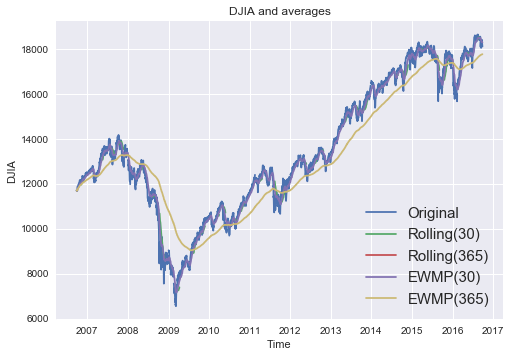

In [83]:

DJIA['roll30'] = DJIA.rolling(window=30).mean().values
DJIA['roll365'] = DJIA['VALUE'].rolling(window=365).mean().values
DJIA['exp30'] = pd.ewma(DJIA["VALUE"], span=30, freq="D")
DJIA['exp365'] = pd.ewma(DJIA["VALUE"], span=365, freq="D")


plt.plot(DJIA)
plt.legend(["Original", "Rolling(30)", "Rolling(365)", "EWMP(30)", "EWMP(365)"], fontsize=15)

plt.title("DJIA and averages")
plt.xlabel("Time")
plt.ylabel("DJIA")
plt.show()